In [1]:
from keras.models import model_from_json

json = open('model3.json', 'r')
model_json = json.read()
json.close()
model = model_from_json(model_json)
model.load_weights('model3.h5')

In [2]:
import tensorflow as tf

import pandas as pd
import numpy as np

from tqdm.notebook import tqdm  

import os

from keras_preprocessing.image import load_img

In [3]:
TEST_DIR = 'test'

In [4]:
BATCH_SIZE = 128
IMG_SIZE = (224, 224)

In [5]:
pred_dataset = tf.keras.utils.image_dataset_from_directory('test2', shuffle=False, batch_size=BATCH_SIZE, image_size=IMG_SIZE, labels=None)
# pred_dataset = tf.data.Dataset.from_tensor_slices([f'test/image_{i+1}' for i in range(500))


Found 500 files belonging to 1 classes.


In [6]:
import matplotlib.pyplot as plt

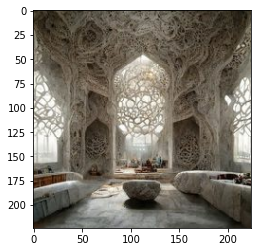

In [8]:
plt.imshow(np.int16(next(pred_dataset.as_numpy_iterator())[2]), interpolation='nearest')

In [9]:
class_names = ['AI', 'Real']

In [10]:
# Retrieve a batch of images from the test set
outs = []

for image_batch in pred_dataset.as_numpy_iterator():
  predictions = model.predict_on_batch(image_batch).flatten()

  predictions = np.round(predictions)
  predictions = np.int8(predictions)
  predictions = tf.convert_to_tensor(predictions)

  outs.extend([class_names[i] for i in list(predictions.numpy())])
  print('Predictions:\n', predictions.numpy())

  # plt.figure(figsize=(10, 10))
  # for i in range(9):
  #   ax = plt.subplot(3, 3, i + 1)
  #   plt.imshow(image_batch[i].astype("uint8"))
  #   plt.title(class_names[predictions[i]])
  #   plt.axis("off")

print(outs)

Predictions:
 [0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0
 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1
 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1
 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1]
Predictions:
 [1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0
 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1]
Predictions:
 [0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1
 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0
 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0]
Predictions:
 [1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1
 1 0 0 1 1 

In [12]:
len(outs)

500

In [13]:
csv_outs = []
for i, p in enumerate(outs):
    csv_outs.append([f'image_{i+1}', p])
print(csv_outs)

[['image_1', 'AI'], ['image_2', 'AI'], ['image_3', 'AI'], ['image_4', 'Real'], ['image_5', 'AI'], ['image_6', 'Real'], ['image_7', 'Real'], ['image_8', 'Real'], ['image_9', 'Real'], ['image_10', 'Real'], ['image_11', 'Real'], ['image_12', 'AI'], ['image_13', 'AI'], ['image_14', 'AI'], ['image_15', 'Real'], ['image_16', 'AI'], ['image_17', 'AI'], ['image_18', 'AI'], ['image_19', 'AI'], ['image_20', 'Real'], ['image_21', 'AI'], ['image_22', 'Real'], ['image_23', 'AI'], ['image_24', 'AI'], ['image_25', 'AI'], ['image_26', 'AI'], ['image_27', 'Real'], ['image_28', 'AI'], ['image_29', 'Real'], ['image_30', 'AI'], ['image_31', 'Real'], ['image_32', 'Real'], ['image_33', 'Real'], ['image_34', 'Real'], ['image_35', 'AI'], ['image_36', 'Real'], ['image_37', 'AI'], ['image_38', 'Real'], ['image_39', 'Real'], ['image_40', 'AI'], ['image_41', 'Real'], ['image_42', 'AI'], ['image_43', 'Real'], ['image_44', 'Real'], ['image_45', 'AI'], ['image_46', 'Real'], ['image_47', 'Real'], ['image_48', 'Real']

In [85]:
import csv

with open('outs.csv', 'w', newline='') as myfile:
     wr = csv.writer(myfile)
     wr.writerows(csv_outs)